## importando librerias

In [1]:
library(alr4)
library(MPV)

Loading required package: car

Loading required package: carData

Loading required package: effects

lattice theme set by effectsTheme()
See ?effectsTheme for details.

Loading required package: lattice

Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009

Loading required package: randomForest

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



## corigiendo error de los datos en el libro

In [2]:
# Problema 4.18
p4.18
p4.18$x1[2]=1

,x1,x2,x3,y
,<dbl>,<dbl>,<dbl>,<dbl>
1,-1,-1,-1,17.0
2,-1,-1,-1,44.0
3,-1,1,-1,19.0
4,1,1,-1,46.0
5,-1,-1,1,7.0
6,1,-1,1,55.0
7,-1,1,1,15.0
8,1,1,1,41.0
9,0,0,0,29.0


## grafica de dispercion

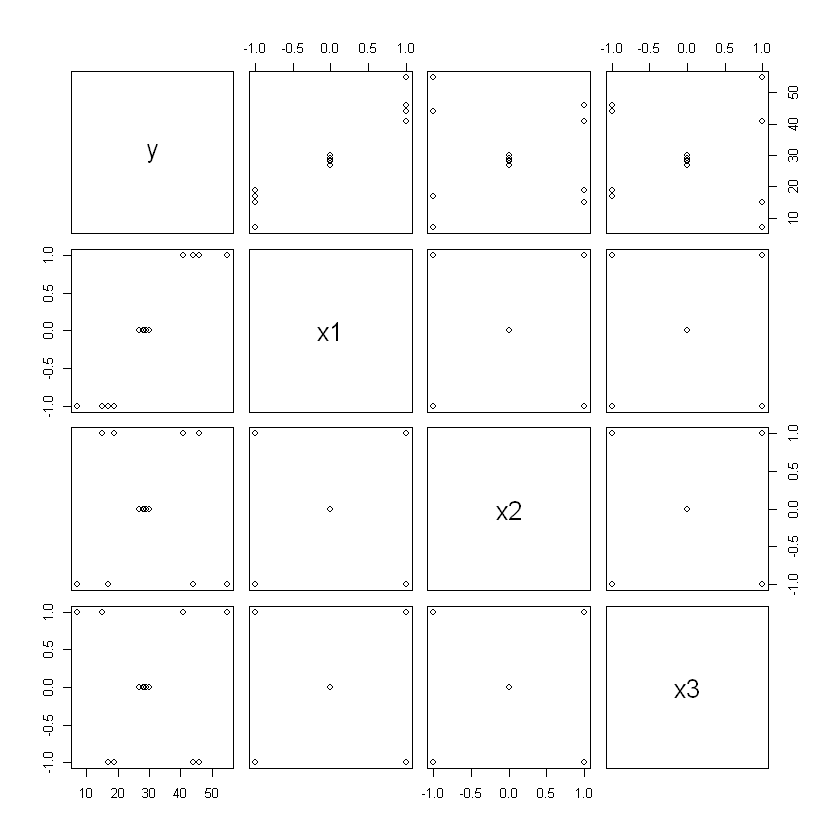

In [3]:
with(p4.18, pairs(~y+x1+x2+x3) )

In [4]:
regresion <- lm(y ~ x1+x2+x3, data=p4.18)

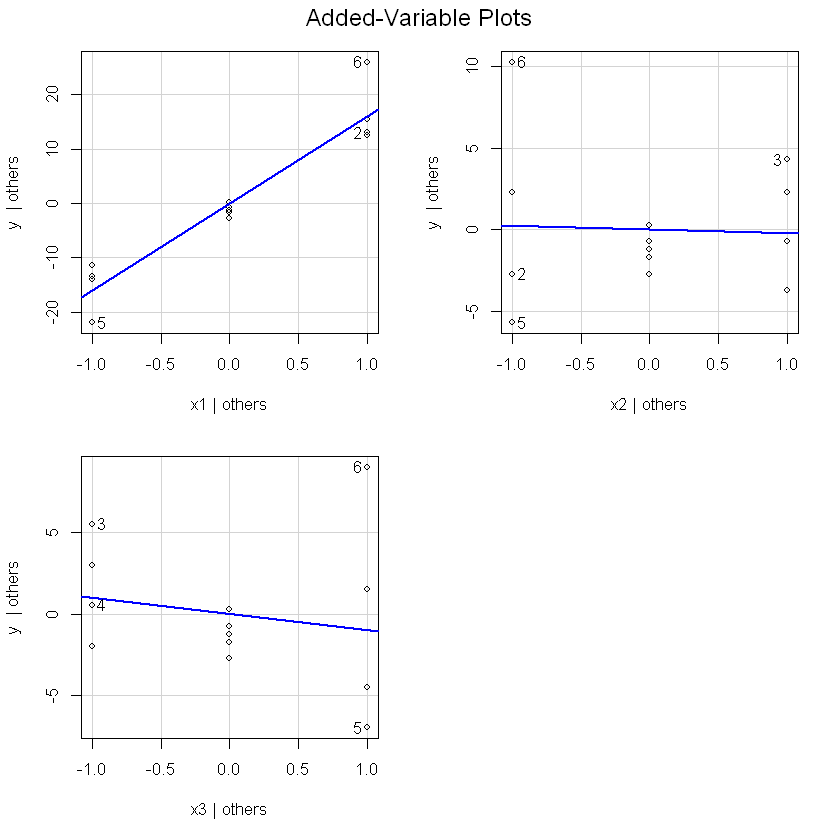

In [5]:
avPlots(regresion)

           Test stat Pr(>|Test stat|)
x1            0.7227           0.4904
x2            0.7227           0.4904
x3            0.7227           0.4904
Tukey test    0.4896           0.6244


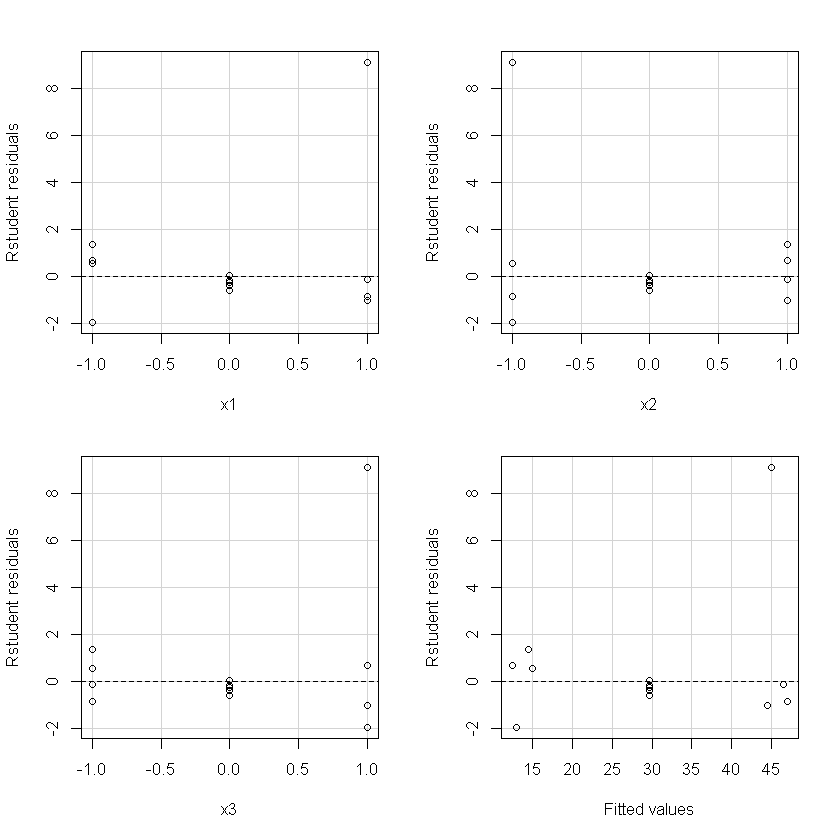

In [6]:
residualPlots(regresion, terms= ~. , type = "rstudent", quadratic=FALSE)

In [10]:
ncvTest(regresion)
ncvTest(regresion, ~ x1 + x2 + x3)
ncvTest(regresion, ~ x1 + x2 )
ncvTest(regresion, ~ x1 + x3 )
ncvTest(regresion, ~ x2 + x3 )
ncvTest(regresion, ~ x1 )
ncvTest(regresion, ~ x2 )
ncvTest(regresion, ~ x3 )

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.6303253, Df = 1, p = 0.42724

Non-constant Variance Score Test 
Variance formula: ~ x1 + x2 + x3 
Chisquare = 7.796982, Df = 3, p = 0.050399

Non-constant Variance Score Test 
Variance formula: ~ x1 + x2 
Chisquare = 3.961881, Df = 2, p = 0.13794

Non-constant Variance Score Test 
Variance formula: ~ x1 + x3 
Chisquare = 4.627477, Df = 2, p = 0.098891

Non-constant Variance Score Test 
Variance formula: ~ x2 + x3 
Chisquare = 7.004605, Df = 2, p = 0.030128

Non-constant Variance Score Test 
Variance formula: ~ x1 
Chisquare = 0.7923762, Df = 1, p = 0.37338

Non-constant Variance Score Test 
Variance formula: ~ x2 
Chisquare = 3.169505, Df = 1, p = 0.075025

Non-constant Variance Score Test 
Variance formula: ~ x3 
Chisquare = 3.835101, Df = 1, p = 0.05019

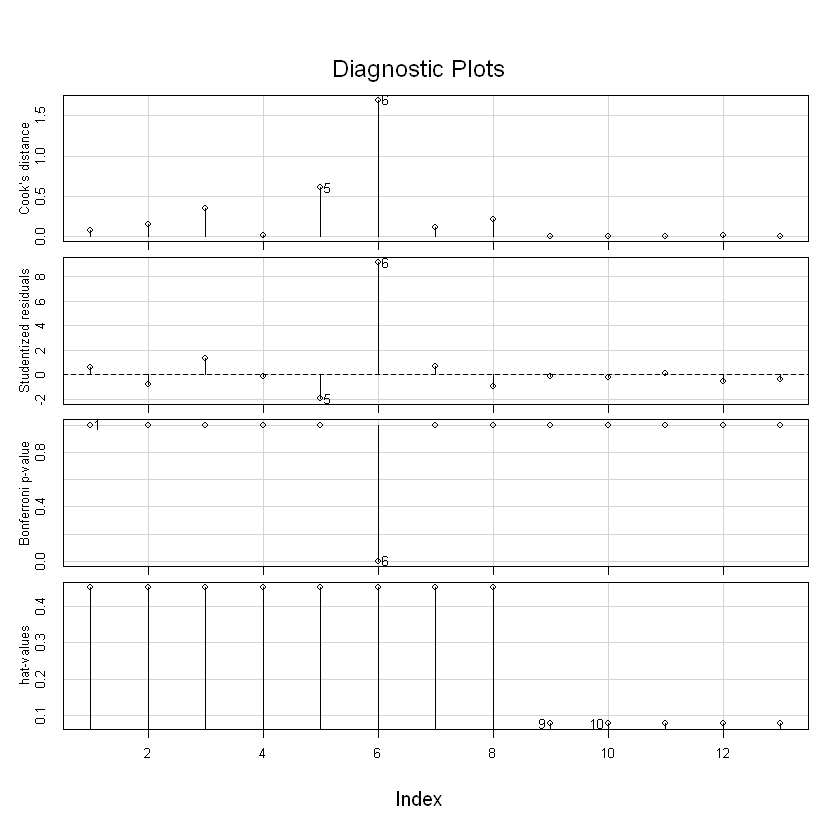

In [11]:
infIndexPlot(regresion)

[1] 6 5

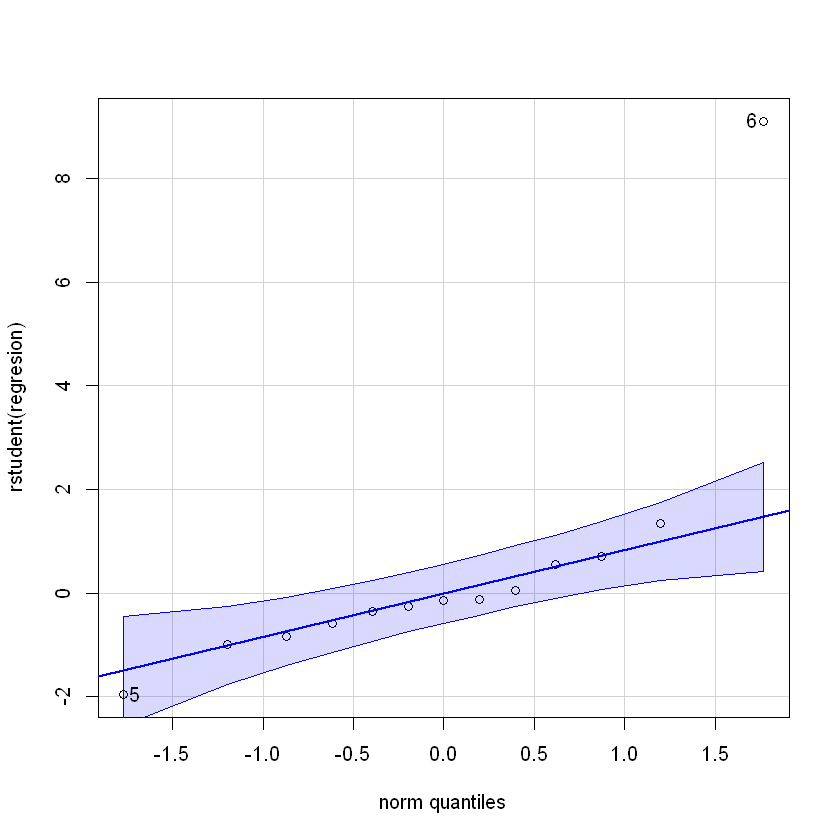

In [12]:
qqPlot(rstudent(regresion))

In [13]:
summary(regresion)


Call:
lm(formula = y ~ x1 + x2 + x3, data = p4.18)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9808 -2.7308 -0.7308  2.0192 10.0192 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    29.73       1.31  22.694 2.97e-09 ***
x1             16.00       1.67   9.581 5.11e-06 ***
x2             -0.25       1.67  -0.150    0.884    
x3             -1.00       1.67  -0.599    0.564    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.724 on 9 degrees of freedom
Multiple R-squared:  0.911,	Adjusted R-squared:  0.8814 
F-statistic: 30.72 on 3 and 9 DF,  p-value: 4.653e-05


In [14]:
anova(regresion)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x1,1,2048.0000,2048.00000,91.7893124,5.105214e-06
x2,1,0.5000,0.50000,0.0224095,8.843038e-01
x3,1,8.0000,8.00000,0.3585520,5.640768e-01
Residuals,9,200.8077,22.31197,NA,NA


## Definicion de factor para realizar prueba falta de ajuste

In [15]:
indicador <-c(1,2,3,4,5,6,7,8,9,9,9,9,9)

## Modelo de regresion con valor ajustado igual a la media muestral de los valores de

## la respuesta con el mismo valor del vector de variables regresoras

In [16]:
regresion.medias <- lm(y ~ factor(indicador), data=p4.18)

anova(regresion.medias)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
factor(indicador),8,2252.308,281.5385,225.2308,4.88465e-05
Residuals,4,5.000,1.2500,NA,NA


## Prueba de falta de ajuste

In [17]:
anova(regresion,regresion.medias,test="F")

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,200.8077,NA,NA,NA,NA
2,4,5.0000,5,195.8077,31.32923,0.002645201


In [18]:
rstudent(regresion)

1           2           3           4           5           6 
 0.55477568 -0.83818690  1.35011770 -0.12975594 -1.96264321  9.11165049 
          7           8           9          10          11          12 
 0.69967991 -0.99479836 -0.15203467 -0.25674048  0.05594297 -0.57907835 
         13 
-0.36250413

## Ajuste del modelo de regresion sin observacion 6

           Test stat Pr(>|Test stat|)
x1           -0.3323           0.7494
x2           -0.3323           0.7494
x3           -0.3323           0.7494
Tukey test   -0.9443           0.3450


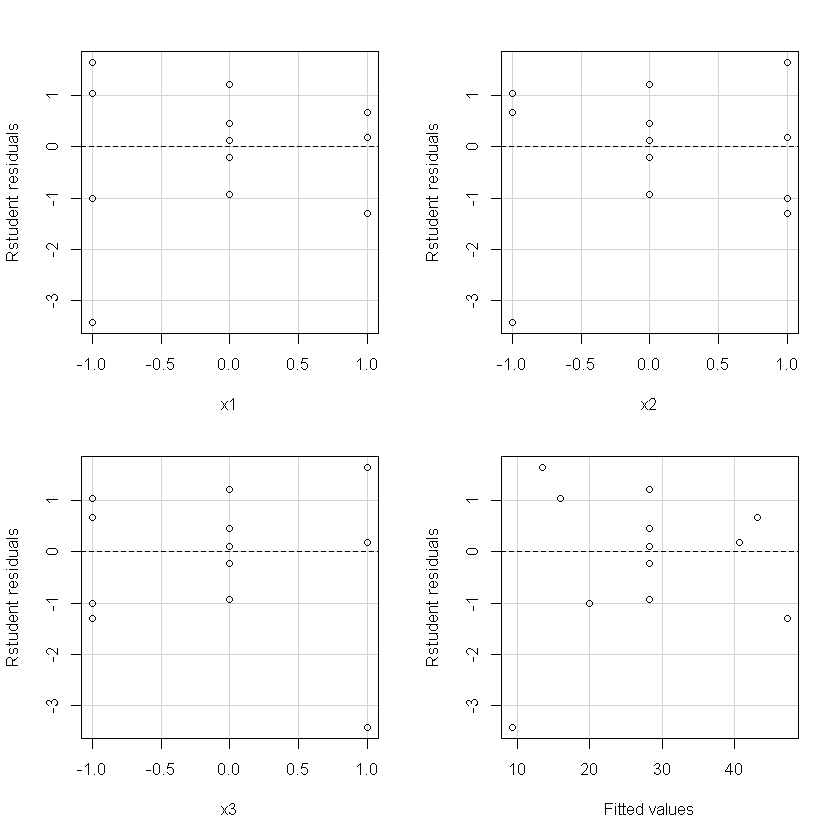

In [19]:
regresion.a <- lm(y ~ x1+x2+x3, data=p4.18, subset=c(-6))

residualPlots(regresion.a, terms= ~. , type = "rstudent", quadratic=FALSE)

## Modelo de regresion con factor con categorias diferentes para cada valor del vector de variables regresoras y sin observacion 6

In [20]:
regresion.medias.a <- lm(y ~ factor(indicador), data=p4.18, subset=c(-6))

## Prueba de falta de ajuste

In [21]:
anova(regresion.a,regresion.medias.a,test="F")

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8,17.64912,NA,NA,NA,NA
2,4,5.00000,4,12.64912,2.529825,0.1953022
